
# MSDS 512 Human Centered Data Science, A1: Data Curation 

## Step 1: Gathering the data

In step 1, we gather the data from respective API endpoints and save JSON outputs to files. 

Let's import required python libraies to be used later in notebook.

In [1]:
import json
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Now define API endpoint for legacy and pageviews endpoints. These will be used in API request. 

In [2]:
# Define Legacy API endpoint
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

# Define Pageviews API
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

Define API call method to get response data from legacy and pageviews endpoints. This API accepts endpoint and parameters as input and returns response data from respective API.

In [3]:
# Params: project, access-site, granularity, start datetime, end datetime
# returns: pagecount response aggregated at given granulaity for given agent
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

Here, we define parameters for getting aggregated legacy count and pageviews data. These parameters later become input for API request and these needs to conform to API request format requirements. 

In [4]:
# Define parameters for getting aggregated legacy view data
# API: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
params_legacy_desktop = {
                         "project" : "en.wikipedia.org",
                         "access-site" : "desktop-site",
                         "granularity" : "monthly",
                         "start" : "2007120100",
                         "end" : "2016080100"
                        }

params_legacy_mobile = {
                         "project" : "en.wikipedia.org",
                         "access-site" : "mobile-site",
                         "granularity" : "monthly",
                         "start" : "2007120100",
                         "end" : "2016080100"
                        }

#  Parameters for getting aggregated current standard pageview data
# API: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
params_pageviews_desktop = {
                            "project" : "en.wikipedia.org",
                            "access" : "desktop",
                            "agent" : "user",
                            "granularity" : "monthly",
                            "start" : "2015070100",
                            "end" : '2020090100'
                            }

params_pageviews_mobile_web = {
                            "project" : "en.wikipedia.org",
                            "access" : "mobile-web",
                            "agent" : "user",
                            "granularity" : "monthly",
                            "start" : "2015070100",
                            "end" : '2020090100'
                            }

params_pageviews_mobile_app = {
                            "project" : "en.wikipedia.org",
                            "access" : "mobile-app",
                            "agent" : "user",
                            "granularity" : "monthly",
                            "start" : "2015070100",
                            "end" : '2020090100'
                            }

# User information
headers = {
    'User-Agent': 'https://github.com/amold',
    'From': 'amold@uw.edu'
}

Now, this code block actually executes API call to retrieve data for legacy and pageviws APIs. It calls API method 'api_call' defined earlier by passing endpoint name and parameter configuration name. We execute this for all 5 typyes of data and save the response JSON in respective dataframe objects.

In [5]:
legacy_desktop_site_200712_201607 = api_call(endpoint_legacy, params_legacy_desktop)
legacy_mobile_site_200712_201607 = api_call(endpoint_legacy, params_legacy_mobile)
pageviews_desktop_201507_202008 = api_call(endpoint_pageviews, params_pageviews_desktop)
pageviews_mobile_web_201507_202008 = api_call(endpoint_pageviews, params_pageviews_mobile_web)
pageviews_mobile_app_201507_202008 = api_call(endpoint_pageviews, params_pageviews_mobile_app)

Now, we output JSON-formatted source data files to directory. We use json.dump feature to accomplish writing JSON objects to files.

In [6]:
with open('legacy_desktop-site_200712-201607.json', 'w') as outfile:
    json.dump(legacy_desktop_site_200712_201607, outfile)

with open('legacy_mobile-site_200712-201607.json', 'w') as outfile:
    json.dump(legacy_mobile_site_200712_201607, outfile)

with open('pageviews_desktop_201507-202008.json', 'w') as outfile:
    json.dump(pageviews_desktop_201507_202008, outfile)
    
with open('pageviews_mobile-web_201507-202008.json', 'w') as outfile:
    json.dump(pageviews_mobile_web_201507_202008, outfile)
    
with open('pageviews_mobile-app_201507-202008.json', 'w') as outfile:
    json.dump(pageviews_mobile_app_201507_202008, outfile)

## Step 2: Processing the data

In data processing step we format and transform the JSON data into dataframe, combine data from differerent sources together and output the clean processed file as csv.

First, we flatten the JSON output to get individual item values, then we strip out year and month fields from timestamp field. Dataframe with resultantant columns is created separately for each type of data source. 

In [7]:
df_pagecount_desktop_site = pd.DataFrame(columns = ['year', 'month', 'pagecount_desktop_views']) 
data = [*legacy_desktop_site_200712_201607.values()][0]
for item in data:
    new_row = {'year':item['timestamp'][0:4], 'month':item['timestamp'][4:6], 'pagecount_desktop_views':item['count']}
    df_pagecount_desktop_site = df_pagecount_desktop_site.append(new_row, ignore_index=True)

df_pagecount_mobile_site = pd.DataFrame(columns = ['year', 'month', 'pagecount_mobile_views']) 
data = [*legacy_mobile_site_200712_201607.values()][0]
for item in data:
    new_row = {'year':item['timestamp'][0:4], 'month':item['timestamp'][4:6], 'pagecount_mobile_views':item['count']}
    df_pagecount_mobile_site = df_pagecount_mobile_site.append(new_row, ignore_index=True)
    
df_pageview_desktop = pd.DataFrame(columns = ['year', 'month', 'pageview_desktop_views']) 
data = [*pageviews_desktop_201507_202008.values()][0]
for item in data:
    new_row = {'year':item['timestamp'][0:4], 'month':item['timestamp'][4:6], 'pageview_desktop_views':item['views']}
    df_pageview_desktop = df_pageview_desktop.append(new_row, ignore_index=True)
    
df_pageview_mobileweb = pd.DataFrame(columns = ['year', 'month', 'pageview_mobile_views']) 
data = [*pageviews_mobile_web_201507_202008.values()][0]
for item in data:
    new_row = {'year':item['timestamp'][0:4], 'month':item['timestamp'][4:6], 'pageview_mobile_views':item['views']}
    df_pageview_mobileweb = df_pageview_mobileweb.append(new_row, ignore_index=True)
    
df_pageview_mobileapp = pd.DataFrame(columns = ['year', 'month', 'pageview_mobile_views']) 
data = [*pageviews_mobile_app_201507_202008.values()][0]
for item in data:
    new_row = {'year':item['timestamp'][0:4], 'month':item['timestamp'][4:6], 'pageview_mobile_views':item['views']}
    df_pageview_mobileapp = df_pageview_mobileapp.append(new_row, ignore_index=True)

Here we sum up legacy  mobile-web and  mobile-app pageviews to get all mobilde pageviews traffic. Also we merge all dataframes together to create single unified dataframe joined on month and year and having columns for each type of data.

In [8]:
df_pageview_mobile = pd.concat([df_pageview_mobileweb, df_pageview_mobileapp]).groupby(['year', 'month'])['pageview_mobile_views'].sum().reset_index()
df_pagecount = pd.merge(df_pagecount_desktop_site, df_pagecount_mobile_site, how='outer', on=['year', 'month'])
df_pageviews = pd.merge(df_pageview_desktop, df_pageview_mobile, how='outer', on=['year', 'month'])
df = pd.merge(df_pagecount, df_pageviews, how='outer', on=['year', 'month'])
df = df.fillna(0)

We here convert the datatype of fields from object to integer for accurate transformations and visualization. 

In [9]:
df["year"] = df["year"].astype(str).astype(int)
df["month"] = df["month"].astype(str).astype(int)
df["pagecount_desktop_views"] = df["pagecount_desktop_views"].astype(str).astype(int)
df["pagecount_mobile_views"] = df["pagecount_mobile_views"].astype(str).astype(int)
df["pageview_desktop_views"] = df["pageview_desktop_views"].astype(str).astype(int)
df["pageview_mobile_views"] = df["pageview_mobile_views"].astype(float).astype(int)

Now, we create derived columns in dataframe to store sum of all pagecount traffic and all pageviews traffic from their respective sources. 

In [10]:
df['pagecount_all_views'] = df.pagecount_desktop_views + df.pagecount_mobile_views
df['pageview_all_views'] = df.pageview_desktop_views + df.pageview_mobile_views
df_en_wikipedia_traffic_200712_202008 = df[['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views',
                            'pagecount_mobile_views', 'pageview_all_views', 'pageview_desktop_views', 
                             'pageview_mobile_views']]

Let's visualize our finalized processed dataframe ready to be output to file. 

In [11]:
df_en_wikipedia_traffic_200712_202008.head()

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2007,12,2998331524,2998331524,0,0,0,0
1,2008,1,4930902570,4930902570,0,0,0,0
2,2008,2,4818393763,4818393763,0,0,0,0
3,2008,3,4955405809,4955405809,0,0,0,0
4,2008,4,5159162183,5159162183,0,0,0,0


Finally we output processed data to csv file in required format and naming convention. 

In [12]:
# Write final dataframe to file
df_en_wikipedia_traffic_200712_202008.to_csv('en_wikipedia_traffic_200712_202008.csv')

## Step 3: Analyze the data

In data analysis phase, we analyze the data as per given instuctions to get better insights how the trend has changed over period of time and with new data website.  

Now, as per instructions for visualization we want to track 3 metrics mobile traffic, desktop traffic, and all traffic (mobile + desktop). Below we add new derived columns to fulfill the requirement. 

In [13]:
# Prepare dataframe for visualization
df['desktop_traffic'] = (df.pagecount_desktop_views + df.pageview_desktop_views)/1000000
df['mobile_traffic'] = (df.pagecount_mobile_views + df.pageview_mobile_views)/1000000
df['total_traffic'] = df.desktop_traffic + df.mobile_traffic

Here we use matplotlib library to plot line chart for 3 metrics of interest (mobile traffic, desktop traffic, and all traffic (mobile + desktop)). We properly labelled the chart, scale information and provided legends.

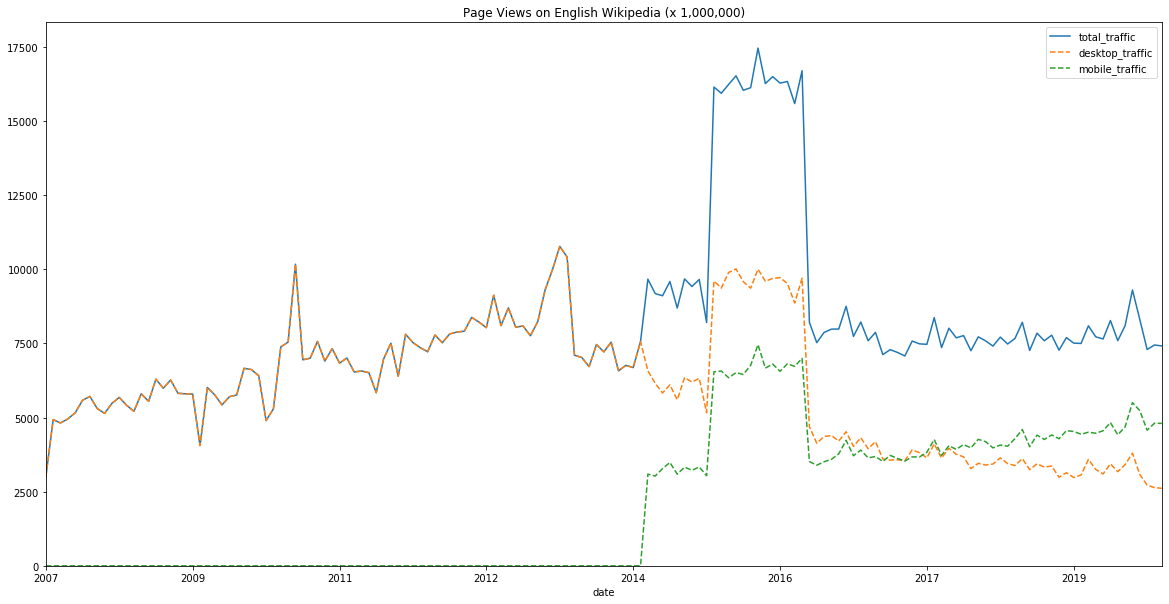

In [14]:
df['date'] = df['month'].map(str)+ '-' +df['year'].map(str)
df['date'] = pd.to_datetime(df['date'], format='%m-%Y').dt.strftime('%Y')
ax = df.plot(figsize=(20,10), x='date', y=['total_traffic', 'desktop_traffic', 'mobile_traffic'] , kind='line', style=['-', '--', '--'])
ax.set_ylim(bottom=0)
ax.set_title('Page Views on English Wikipedia (x 1,000,000)')
axs[0].set_xlabel('distance (m)')
plt.show()